In [1]:
# standard imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import os

import sklearn
from sklearn.model_selection import train_test_split

# ignore warnings
import warnings
warnings.filterwarnings("ignore")

# custom imports
from env import host, user, password
import explore as e

In [2]:
def get_connection(db, user=user, host=host, password=password):
    '''
    This function uses my info from my env file to
    create a connection url to access the Codeup db.
    It takes in a string name of a database as an argument.
    '''
    return f'mysql+pymysql://{user}:{password}@{host}/{db}'

In [3]:
def new_mall_data():
    '''
    This function reads the data from the Codeup db into a df and returns the df.
    '''
    # Create SQL query.
    sql_query = """
    select * from customers;
    """
    
    # Read in DataFrame from Codeup db.
    df = pd.read_sql(sql_query, get_connection('mall_customers'))
    
    return df

In [4]:
def get_mall_data():
    '''
    This function reads in data from Codeup database, writes data to
    a csv file if a local file does not exist, and returns a df.
    '''
    if os.path.isfile('mall_customers_df.csv'):
        
        # If csv file exists, read in data from csv file.
        df = pd.read_csv('mall_customers_df.csv', index_col=0)
        
    else:
        
        # Read fresh data from db into a DataFrame.
        df = new_mall_data()
        
        # Write DataFrame to a csv file.
        df.to_csv('mall_customers_df.csv')
        
    return df

In [5]:
df = get_mall_data()

In [6]:
df.head()

,customer_id,gender,age,annual_income,spending_score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [7]:
df.shape

(200, 5)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   customer_id     200 non-null    int64 
 1   gender          200 non-null    object
 2   age             200 non-null    int64 
 3   annual_income   200 non-null    int64 
 4   spending_score  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 9.4+ KB


In [9]:
df.describe()

,customer_id,age,annual_income,spending_score
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [10]:
# split data
train_validate, test = train_test_split(df, test_size=0.20, random_state=123)
train, validate = train_test_split(train_validate, test_size=.25, random_state=123)


In [11]:
train.shape, validate.shape, test.shape

((120, 5), (40, 5), (40, 5))

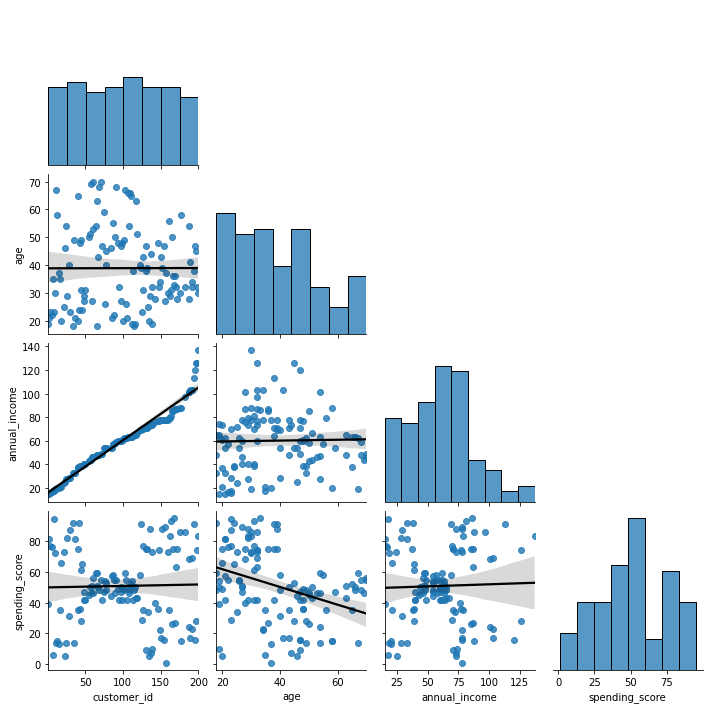

In [12]:
e.plot_variable_pairs(train)

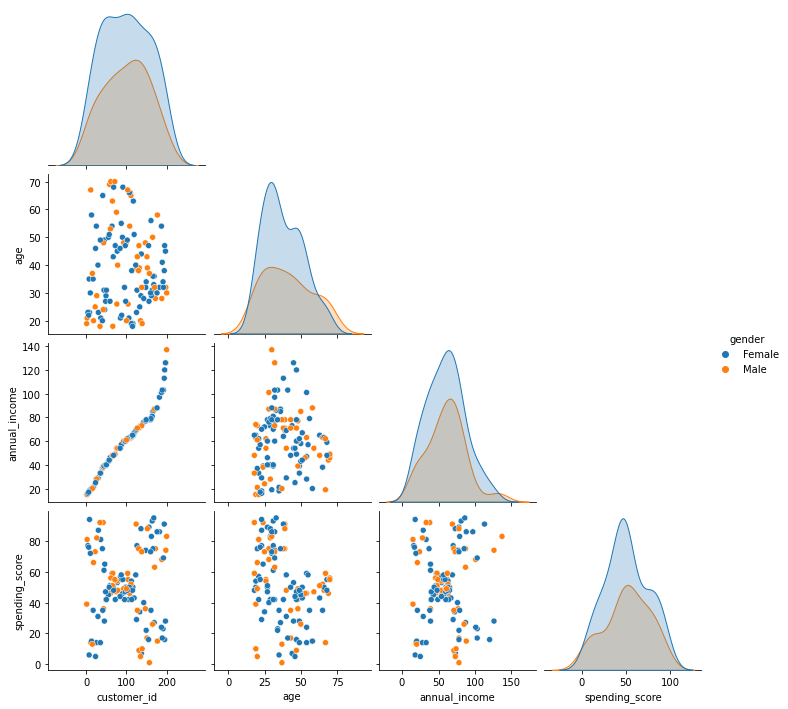

In [13]:
e.plot_variable_pairs_cat_hue(train)

In [14]:
cat_cols = train.select_dtypes('object').columns.tolist()

In [15]:
num_cols = train.select_dtypes('number').columns.tolist()

In [16]:
num_cols

['customer_id', 'age', 'annual_income', 'spending_score']


~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
gender
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

----------------------------------------------------------------------------------------------------------
customer_id
----------------------------------------------------------------------------------------------------------



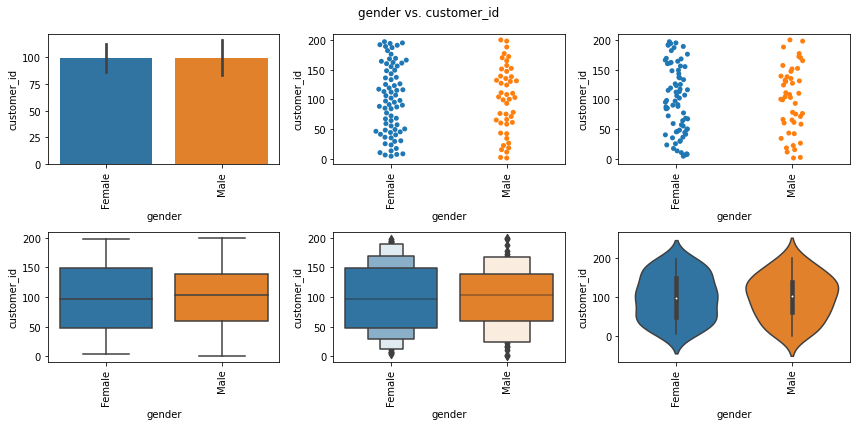


----------------------------------------------------------------------------------------------------------
age
----------------------------------------------------------------------------------------------------------



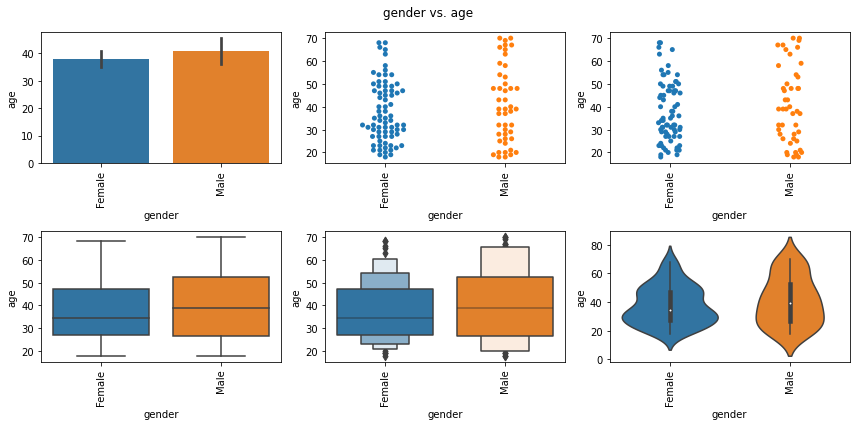


----------------------------------------------------------------------------------------------------------
annual_income
----------------------------------------------------------------------------------------------------------



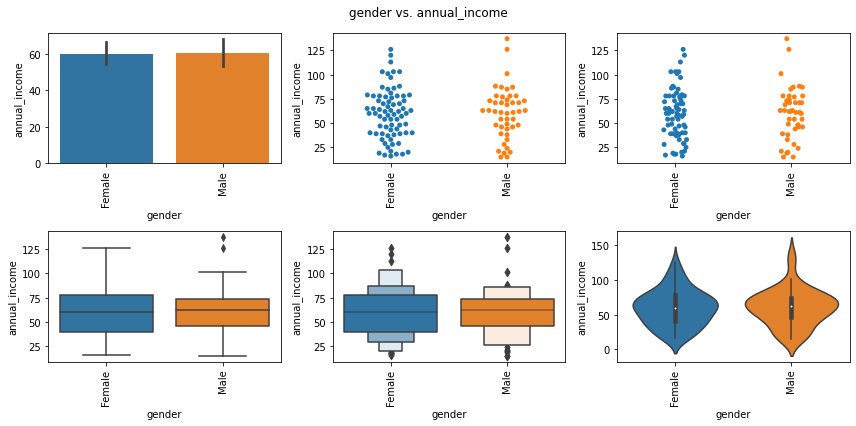


----------------------------------------------------------------------------------------------------------
spending_score
----------------------------------------------------------------------------------------------------------



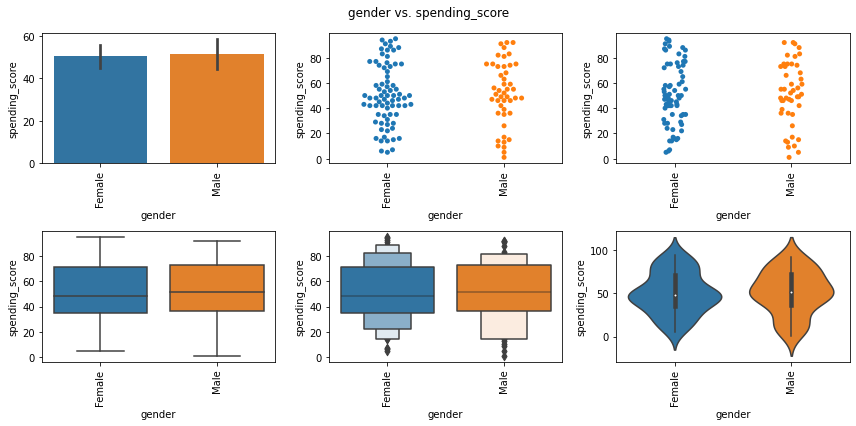

In [17]:
e.plot_categorical_and_continuous_vars(train, cat_cols, num_cols)

In [18]:
def plot_categorical_and_continuous_vars(df, cat_cols, num_cols):
    for cat_col in cat_cols:
        
        print('\n~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')
        print(cat_col)
        print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')
        
        for num_col in num_cols:
            
            print('\n----------------------------------------------------------------------------------------------------------')
            print(num_col)
            print('----------------------------------------------------------------------------------------------------------\n')
           
            fig = plt.figure(figsize = (12,6))
            fig.suptitle(f'{cat_col} vs. {num_col}')
            
            gs = plt.GridSpec(2,3)
            
            ax1 = fig.add_subplot(gs[0,0])
            sns.barplot(x=cat_col, y=num_col, data=df)
            plt.xticks(rotation = 90)
            
            ax2 = fig.add_subplot(gs[0,1])
            sns.swarmplot(x=cat_col, y=num_col, data=df)
            plt.xticks(rotation = 90)
            
            ax3 = fig.add_subplot(gs[0,2])
            sns.stripplot(x=cat_col, y=num_col, data=df)
            plt.xticks(rotation = 90)
            
            ax4 = fig.add_subplot(gs[1,0])
            sns.boxplot(x=cat_col, y=num_col, data=df)
            plt.xticks(rotation = 90)
            
            ax5 = fig.add_subplot(gs[1,1])
            sns.boxenplot(x=cat_col, y=num_col, data=df)
            plt.xticks(rotation = 90)
            
            ax6 = fig.add_subplot(gs[1,2])
            sns.violinplot(x=cat_col, y=num_col, data=df)
            plt.xticks(rotation = 90)
            
            plt.tight_layout()
            plt.show();


~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
gender
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

----------------------------------------------------------------------------------------------------------
customer_id
----------------------------------------------------------------------------------------------------------



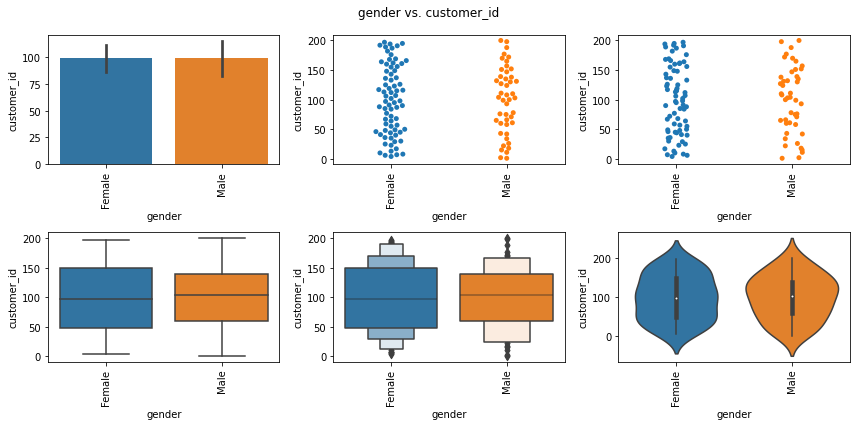


----------------------------------------------------------------------------------------------------------
age
----------------------------------------------------------------------------------------------------------



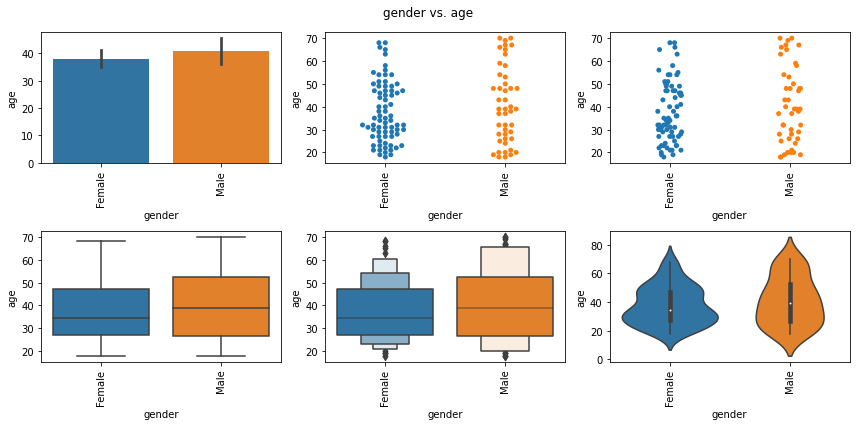


----------------------------------------------------------------------------------------------------------
annual_income
----------------------------------------------------------------------------------------------------------



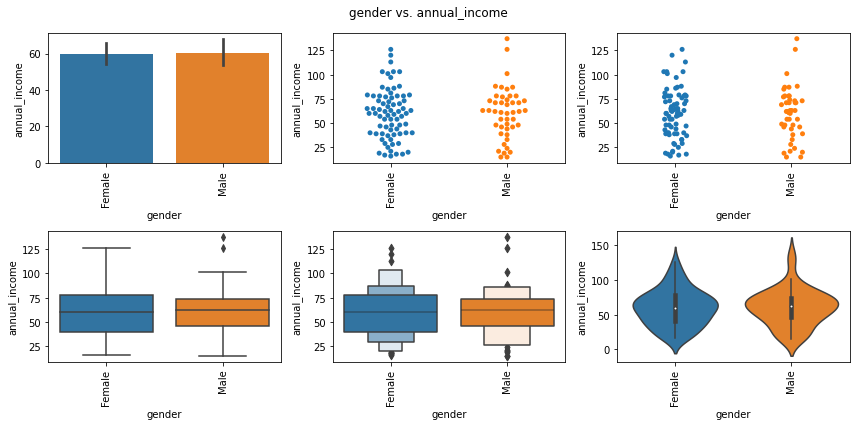


----------------------------------------------------------------------------------------------------------
spending_score
----------------------------------------------------------------------------------------------------------



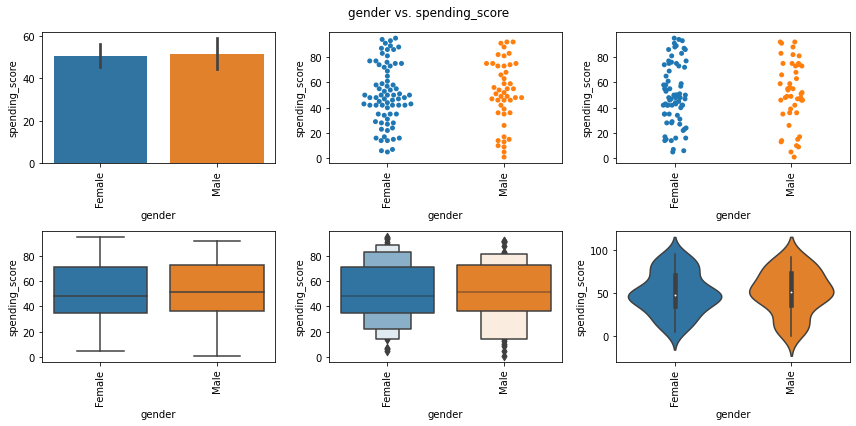

In [19]:
plot_categorical_and_continuous_vars(train, cat_cols, num_cols)